# Segment out the joints (red dots)

Frame shape: (820, 672, 3)
Frame dtype: uint8
Frame size (bytes): 1653120


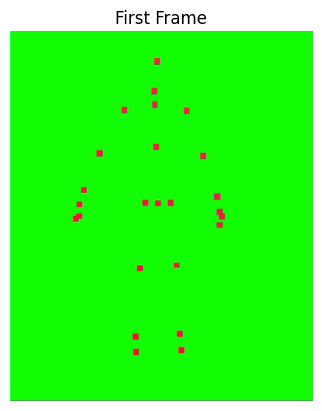

In [41]:
import cv2
import matplotlib.pyplot as plt

# Load the video file
video = cv2.VideoCapture("../input/unity-joints.mp4")

# Read the first frame
ret, frame = video.read()
video.release()

if ret:
  # Print some properties about the image
  print("Frame shape:", frame.shape)  # (height, width, channels)
  print("Frame dtype:", frame.dtype)
  print("Frame size (bytes):", frame.nbytes)
else:
  print("Failed to read the first frame from the video.")

# Convert BGR (OpenCV) to RGB (matplotlib)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.title("First Frame")
plt.show()

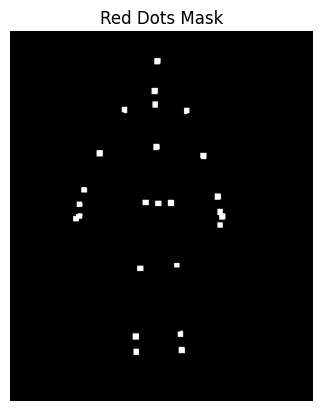

In [42]:
import numpy as np

# If your image is RGB (from matplotlib or elsewhere), convert to BGR for OpenCV
frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

# Convert BGR to HSV
img_hsv = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2HSV)

# Tune HSV ranges for bright red
# Red hue is around 0 and 180 (OpenCV: 0-179). Bright red: high S and V.
lower_red1 = np.array([0, 120, 100])    # [H, S, V] (lower hue, higher sat/val)
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 120, 100])  # [H, S, V] (upper hue, higher sat/val)
upper_red2 = np.array([180, 255, 255])

# Create masks for the two red ranges and combine
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Optional: Clean up small noise with morphological operations
kernel = np.ones((5, 5), np.uint8)  # Slightly larger kernel for dots
red_mask_clean = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)
red_mask_clean = cv2.morphologyEx(red_mask_clean, cv2.MORPH_CLOSE, kernel)

# Show the mask
plt.imshow(red_mask_clean, cmap='gray')
plt.title("Red Dots Mask")
plt.axis('off')
plt.show()

# Obtain the coords of each joint, relative to the top-left corner

In [43]:
# Find Contours of Red Dots

# Find contours in the mask
contours, _ = cv2.findContours(red_mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

dot_centers = []
min_area = 10  # Minimum area to filter out noise

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        M = cv2.moments(contour)
        if M["m00"] > 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            dot_centers.append((cx, cy))

print(f"Found {len(dot_centers)} red dots.")

Found 23 red dots.


In [44]:
# Sort and Number the Dots

# Sort by y, then x for consistency
dot_centers_sorted = sorted(dot_centers, key=lambda p: (p[1], p[0]))

# Display the sorted coordinates
for idx, (x, y) in enumerate(dot_centers_sorted):
    print(f"Dot {idx}: (x={x}, y={y})")

Dot 0: (x=326, y=66)
Dot 1: (x=320, y=132)
Dot 2: (x=321, y=162)
Dot 3: (x=253, y=174)
Dot 4: (x=391, y=176)
Dot 5: (x=324, y=256)
Dot 6: (x=198, y=270)
Dot 7: (x=428, y=276)
Dot 8: (x=163, y=351)
Dot 9: (x=460, y=366)
Dot 10: (x=300, y=379)
Dot 11: (x=356, y=380)
Dot 12: (x=328, y=381)
Dot 13: (x=153, y=383)
Dot 14: (x=468, y=405)
Dot 15: (x=149, y=412)
Dot 16: (x=465, y=429)
Dot 17: (x=369, y=518)
Dot 18: (x=288, y=525)
Dot 19: (x=377, y=671)
Dot 20: (x=278, y=676)
Dot 21: (x=380, y=706)
Dot 22: (x=279, y=710)


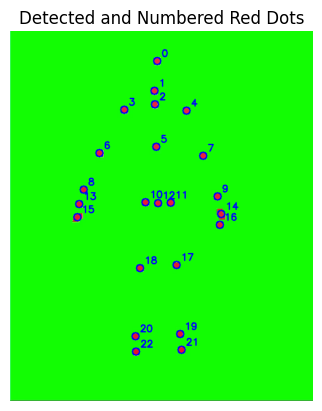

In [45]:
# Visualize the Numbered Dots on the Image

# Copy image for drawing
img_out = frame_rgb.copy()

# Draw green circles and numbers
for idx, (x, y) in enumerate(dot_centers_sorted):
    cv2.circle(img_out, (x, y), 8, (0, 0, 255), 2)
    cv2.putText(img_out, str(idx), (x+10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

# Show the result
plt.imshow(img_out)
plt.title("Detected and Numbered Red Dots")
plt.axis('off')
plt.show()

# Create image with transparent background

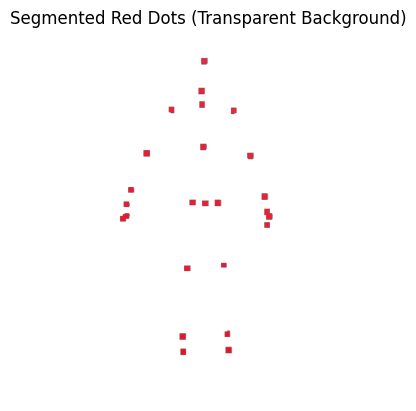

In [46]:
# Create an RGBA image with transparent background
img_rgba = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2RGBA)

# Set alpha channel: 255 where red_mask_clean > 0, 0 elsewhere
alpha_channel = np.where(red_mask_clean > 0, 255, 0).astype(np.uint8)
img_rgba[..., 3] = alpha_channel

# Set RGB to 0 where not red dot (optional, for full transparency)
img_rgba[..., :3][alpha_channel == 0] = 0

plt.imshow(img_rgba)
plt.title("Segmented Red Dots (Transparent Background)")
plt.axis('off')
plt.show()

# Load the first frame of the clothing video

Frame2 shape: (820, 672, 3)
Frame2 dtype: uint8
Frame2 size (bytes): 1653120


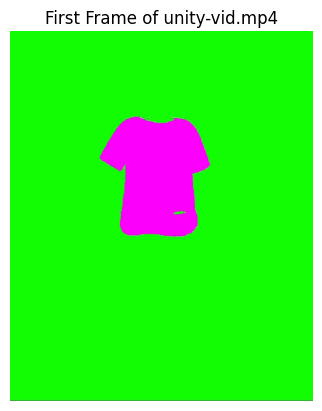

In [47]:
# Load the video file "unity-vid.mp4"
video2 = cv2.VideoCapture("../input/unity-vid.mp4")

# Read the first frame
ret2, frame2 = video2.read()
video2.release()

if ret2:
  print("Frame2 shape:", frame2.shape)
  print("Frame2 dtype:", frame2.dtype)
  print("Frame2 size (bytes):", frame2.nbytes)
  # Convert BGR to RGB for display
  frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
  plt.imshow(frame2_rgb)
  plt.axis('off')
  plt.title("First Frame of unity-vid.mp4")
  plt.show()
else:
  print("Failed to read the first frame from unity-vid.mp4.")

# Overlay the joints on the clothing to show accuracy

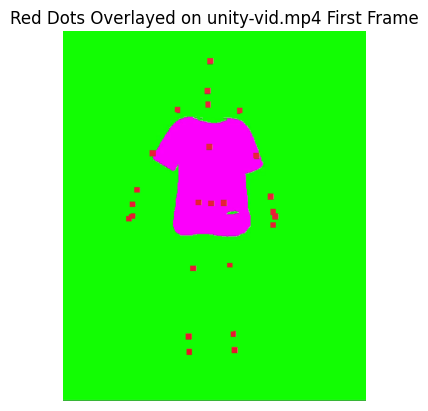

In [48]:
# Overlay img_rgba (red dots with transparency) onto frame2_rgb

# Ensure both images are the same size
assert img_rgba.shape[:2] == frame2_rgb.shape[:2], "Image sizes do not match!"

# Prepare output image as a copy of frame2_rgb
overlay_result = frame2_rgb.copy()

# Blend where alpha_channel > 0 (i.e., where red dots are)
alpha = img_rgba[..., 3] / 255.0  # Normalize alpha to [0,1]
for c in range(3):  # For R, G, B channels
  overlay_result[..., c] = (img_rgba[..., c] * alpha + overlay_result[..., c] * (1 - alpha)).astype(np.uint8)

plt.imshow(overlay_result)
plt.title("Red Dots Overlayed on unity-vid.mp4 First Frame")
plt.axis('off')
plt.show()

# Segment out the clothing from the first frame

In [49]:
from __future__ import annotations

from typing import Any

import cv2
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt


def show_image(image: Any, title: str = "Image") -> None:
    """
    Display an image using matplotlib.

    Args:
        image (PIL.Image.Image): The image to display.
        title (str): The title of the image window.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

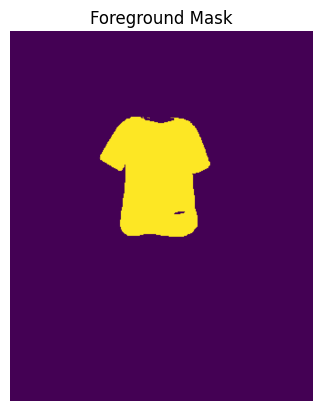

In [50]:
# Read the image using OpenCV and generate binary mask

frame2_rgb = cv2.cvtColor(frame2_rgb, cv2.COLOR_RGB2BGR)

# Convert the image to HSV color space
hsv = cv2.cvtColor(frame2_rgb, cv2.COLOR_BGR2HSV)

# Mask for green background
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
bg_mask = cv2.inRange(hsv, lower_green, upper_green)

# Invert background mask: 255 where not background
fg_mask = cv2.bitwise_not(bg_mask)

show_image(fg_mask, "Foreground Mask")

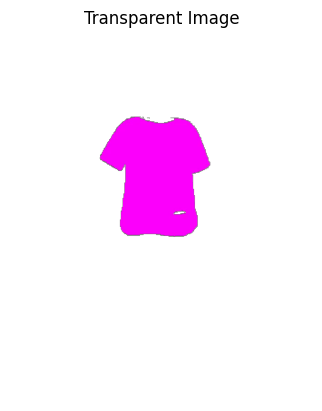

True

In [53]:
# Apply the mask to the original image to obtain a transparent image

# Read the original image using OpenCV
img_rgb = cv2.cvtColor(frame2, cv2.COLOR_RGB2BGR)

# Mask the original image with the foreground mask
alpha = fg_mask
img_rgb_masked = cv2.bitwise_and(img_rgb, img_rgb, mask=alpha)
img_rgba = np.dstack([img_rgb_masked, alpha])

show_image(img_rgba, "Transparent Image")

# Save the transparent image
cv2.imwrite("../input/transparent.png",
            cv2.cvtColor(img_rgba, cv2.COLOR_BGR2RGBA))